# **Eat OUT Recommendation System**

##### **Group 1 (i.e. Foodies) members**:
<ul type='square'> 
    <li> David Mwiti</li>
    <li> Karen Amanya</li>
    <li> Mercy Onduso </li>
    <li> Nicholus Magak </li>
    <li> Penina Wanyama </li>
    <li> Stephen Thuo </li>
</ul>

# Business Understanding

## **Overview**

### **Problem Statement**
EatOut is a food tech and media business primarily based in Kenya and East Africa. It was founded in 2010 and allows consumers to search through hundreds of restaurants, curating information such as photos, menus, maps, contacts, events, offers and reviews. In this social media age, individuals are moving towards restaurant recommendations given by influencers and other users on platforms such as Instagram and TikTok as they come with a personal review of the food, service and aesthetic feel of the place. This is primarily because a 1-to-5-star rating is not as informative as a video and personal review of a restaurant from a person that has been to place. As a result, many restaurants and hotels are also shifting more towards such platforms as a marketing tool and away from food tech businesses like EatOut meaning less website visits and eventually a drop in revenue for the business.
 They can gain a competitive edge in the market by adding a more personalized feel to their website that will allow users to easily find restaurants and hotels not just based on the cuisine or rank of the rating. This can be achieved by using a content recommender system that is also based on the explicit feedback given by another person and not just the standard approach where recommendations are given according to similarities between them. This will allow the user to simply use key words of the experience they are looking to have and get faster and more relevant recommendations without having to scroll through thousands of items.


### **Objectives**

> **General Objective:**

The general objective of this project is to improve the user experience of the EatOut website and help the business better position themselves in the market to gain a competitive edge and drive back their marketing revenue.
> **Specific Objectives:**

1.	To build a recommender system that will accurately match a user to a restaurant or hotel that is most likely to provide the experience they are looking to have.
2.	To identify the factors that greatly affect a person’s rating or review of a restaurant e.g., service, location, ambience or food.
3.	To improve on the optimization of the EatOut website for both the user and business.

> **Research Questions:**

1.	What features influence a person’s choice and review of a restaurant or hotel?
2.	How can we use explicit user reviews to improve on the accuracy and speed of already existing recommender systems?
3.	How can we optimize the EatOut website to compete with other sources of restaurant recommendations such as social media influencers?


### **Success Criteria**

As the aim of the project is to add a personalized experience to the website, the project’s success will be measured based on its ability to provide fast and relevant recommendations according to key words in a person’s search.

The success criteria we will follow depends on the predictive accuracy of the recommendations. This means we will rate how close the estimated ratings are to genuine use ratings, which is a measure used for evaluating non-binary ratings (e.g. 1-10 scale). Since selling books is crucial for a platform that is in business, this is the best metric we decided to use.

The two metrics that we will use are Mean Squared Error (M.S.E) and Root Mean Squared Error (R.M.S.E) due to the fact the rating scale is the same throughout.



#### **Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')
from dataprep.clean import clean_country #pip install dataprep
import pycountry #conda install -c conda-forge pycountry
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import sidetable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import operator


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

# download nltk packages
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### **Loading the data**

##### _**1. restaurants_df**_

In [2]:
restaurant_df = pd.read_csv('restaurant_data.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False)
restaurant_df.head()

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,"I, t, a, l, i, a, n",hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,"T, h, a, i",jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,"S, z, e, c, h, u, a, n",8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,"S, h, a, n, g, h, a, i, n, e, s, e",0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,"C, o, c, k, t, a, i, l, , B, a, r, s",4DInnPhOyvXFbYpUdO0SMQ,325


##### _**2. users_df**_

In [3]:
user_revs_df = pd.read_csv('final_revs.csv', encoding='utf-8', on_bad_lines='skip', low_memory=False, header=None)
columns=['User_Name','Account','Location','Date_of_review','Rating','Comment','URL']
user_revs_df.columns = columns
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...


# Data Understanding

The data being used on this project was object after scraping on Yelp. It is meant to be used as a mockup for how Eat Out's data could look like on the probability our recommender is accepted.

The data contained two files: 

* **_restaurants.csv_**

Contained the restaurants we desired to recommend. A few notable features in the dataset are name(of restaurant), avg_rating, pricing_range, & cuisine. Regional data we have is from New York hence there is a location field with the restaurants' individual locs.

* **_final_revs.csv_**

Contained user info from the individual restaurants. Users have identification  based on their account links. Other features include (Username, date of review, individual rating). We were also able to acquire comments from users which can be used to give restaurants more context. 


##### _**1. restaurants_df**_

In [4]:
restaurant_df.info()

# Observations:
#   16 columns & 500 rows
#   It has some missing phone & display phone numbers
#   Missing quite a bit of data on the pricing section

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               500 non-null    object 
 1   Rating             500 non-null    int64  
 2   Pricing            315 non-null    object 
 3   URL                500 non-null    object 
 4   Latitude           500 non-null    float64
 5   Longitude          500 non-null    float64
 6   Transactions       500 non-null    object 
 7   Location           500 non-null    object 
 8   Phone              430 non-null    float64
 9   Display Phone      430 non-null    object 
 10  Distance           500 non-null    float64
 11  Reviews            500 non-null    object 
 12  Review Count       500 non-null    int64  
 13  Cuisine            500 non-null    object 
 14  Restaurant ID      500 non-null    object 
 15  Number of Reviews  500 non-null    int64  
dtypes: float64(4), int64(3), o

In [5]:
# Converting the cuisine text to a more human readable format
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].map(lambda x: x.replace(',',''))
restaurant_df['Cuisine'] = restaurant_df['Cuisine'].apply(lambda x: x.replace(" ", ""))

In [6]:
# viewing the types of cuisines 
set(restaurant_df['Cuisine'])

{'American(New)',
 'American(Traditional)',
 'Argentine',
 'AsianFusion',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Belgian',
 'Brazilian',
 'Breakfast&Brunch',
 'BubbleTea',
 'Buffets',
 'Burgers',
 'Burmese',
 'Cafes',
 'Cajun/Creole',
 'Cambodian',
 'Cantonese',
 'Caribbean',
 'ChickenShop',
 'ChickenWings',
 'Chinese',
 'CocktailBars',
 'Coffee&Tea',
 'ComfortFood',
 'Cuban',
 'Delis',
 'Desserts',
 'DimSum',
 'Diners',
 'FastFood',
 'Filipino',
 'Fondue',
 'FoodCourt',
 'French',
 'Gastropubs',
 'Georgian',
 'German',
 'Greek',
 'Grocery',
 'Himalayan/Nepalese',
 'HotDogs',
 'HotPot',
 'Indian',
 'Indonesian',
 'Italian',
 'Izakaya',
 'Japanese',
 'JapaneseCurry',
 'Korean',
 'LatinAmerican',
 'Lebanese',
 'Lounges',
 'Malaysian',
 'Mediterranean',
 'Mexican',
 'MiddleEastern',
 'ModernEuropean',
 'Moroccan',
 'NewMexicanCuisine',
 'Noodles',
 'PanAsian',
 'Patisserie/CakeShop',
 'Persian/Iranian',
 'Peruvian',
 'Pizza',
 'Portuguese',
 'Pubs',
 '

In [7]:
# viewing the number of unique restaurants
len(restaurant_df['Restaurant ID'].unique())

435

In [8]:
# Types of transactions occuring in the restaurants
set(restaurant_df['Transactions'])

{"['delivery', 'pickup', 'restaurant_reservation']",
 "['delivery', 'pickup']",
 "['delivery']",
 "['pickup', 'delivery', 'restaurant_reservation']",
 "['pickup', 'delivery']",
 "['pickup', 'restaurant_reservation', 'delivery']",
 "['restaurant_reservation', 'delivery', 'pickup']",
 "['restaurant_reservation', 'delivery']",
 "['restaurant_reservation']",
 '[]'}

In [9]:
# viewing the locations
set(restaurant_df['Location'])

{'1 Doyers St, New York, NY 10013',
 '1 Greene Ave, Brooklyn, NY 11238',
 '1 John St, Brooklyn, NY 11201',
 '10 Columbus Cir, New York, NY 10019',
 '10 Columbus Cir, Third Floor, New York, NY 10019',
 '10 Hudson Yards, New York, NY 10001',
 '100 Pearl St, New York, NY 10004',
 '102 Lexington Ave, New York, NY 10016',
 '102 Suffolk St, New York, NY 10002',
 '1025 Manhattan Ave, Brooklyn, NY 11222',
 '103 N 3rd St, New York, NY 11249',
 '1035 Flushing Ave, Brooklyn, NY 11237',
 '104 2nd Ave, New York, NY 10003',
 '104 S 4th St, Brooklyn, NY 11249',
 '105 N 6th St, Brooklyn, NY 11249',
 '105 Wilson Ave, New York, NY 11237',
 '1063 1st Ave, New York, NY 10022',
 '108 E 4th St, New York, NY 10003',
 '108 W 74th St, New York, NY 10023',
 '109 N 3rd St, Brooklyn, NY 11249',
 '109 St Marks Pl, New York, NY 10009',
 '11 E 13th St, New York, NY 10003',
 '11 E 30th St, New York, NY 10016',
 '11 E 47th St, New York, NY 10017',
 '11 Hanover Sq, New York, NY 10005',
 '11 Mott St, New York, NY 10013'

In [10]:
# viewing the rating scale of the restaurants
set(restaurant_df['Rating'])

{1, 2, 3, 4, 5}

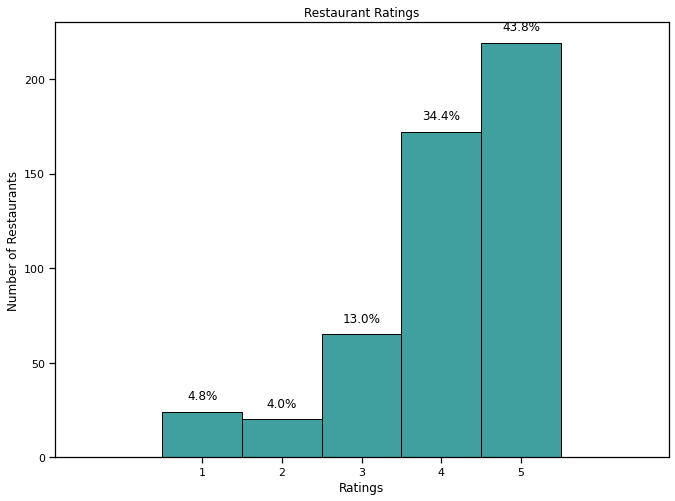

In [11]:
fig, ax = plt.subplots(figsize=(11,8))
sns.histplot(restaurant_df['Rating'], bins = np.arange(8) - 0.5, color='teal', ax=ax)
ax.set_xticks(range(1,6))
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Restaurants')
ax.set_title('Restaurant Ratings');

rating_count = restaurant_df['Rating'].value_counts().sort_index()
for i, val in enumerate(rating_count.values):
    ax.text(i+1, val+5, (f'{round((val/sum(rating_count.values))*100, 1)}%'), ha='center', va='bottom',size=12)  
    
    # Observations:
    # The book rating ranges from 0 to 10
    # Most books have a rating of 0
    # The ratings between 1-4 have very few books

##### _**2. users_df**_

In [12]:
user_revs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127239 entries, 0 to 127238
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_Name       127239 non-null  object 
 1   Account         127239 non-null  object 
 2   Location        127239 non-null  object 
 3   Date_of_review  127239 non-null  object 
 4   Rating          127239 non-null  float64
 5   Comment         127239 non-null  object 
 6   URL             127239 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.8+ MB


In [13]:
# Checking how many unique users rated
len(user_revs_df['Account'].unique())

90324

In [14]:
user_revs_df.describe()

,Rating
count,127239.000000
mean,4.146968
std,1.130784
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [15]:
values = user_revs_df['Location'].value_counts(dropna=False).keys().tolist()
counts = user_revs_df['Location'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))
value_dict

{'New York, NY': 27120,
 'Brooklyn, NY': 14911,
 'Manhattan, NY': 9462,
 'Manhattan, New York, NY': 4096,
 'San Francisco, CA': 3162,
 'Los Angeles, CA': 2675,
 'Queens, NY': 2159,
 'Brooklyn, Brooklyn, NY': 1636,
 'Jersey City, NJ': 1195,
 'Chicago, IL': 1034,
 'Queens, Queens, NY': 1008,
 'Washington, DC': 966,
 'Boston, MA': 899,
 'Philadelphia, PA': 805,
 'Seattle, WA': 787,
 'Bronx, NY': 733,
 'San Diego, CA': 698,
 'Miami, FL': 645,
 'Austin, TX': 625,
 'Houston, TX': 568,
 'San Jose, CA': 562,
 'Flushing, NY': 559,
 'Atlanta, GA': 525,
 'Hoboken, NJ': 442,
 'Staten Island, NY': 441,
 'Dallas, TX': 398,
 'Brooklyn, New York, NY': 366,
 'Irvine, CA': 317,
 'Oakland, CA': 311,
 'Denver, CO': 308,
 'Las Vegas, NV': 294,
 'Toronto, Canada': 285,
 'NY, NY': 268,
 'Orlando, FL': 268,
 'Portland, OR': 255,
 'Baltimore, MD': 252,
 'Cambridge, MA': 239,
 'Honolulu, HI': 225,
 'Berkeley, CA': 220,
 'Long Island City, NY': 213,
 'Arlington, VA': 212,
 'Forest Hills, NY': 208,
 'London, Unit

**Checking for the trend in restaurant ratings production over time**

In [16]:
dic_years = {}
for years in user_revs_df['Date_of_review']:
    if int(years[-4:]) in dic_years.keys():
        dic_years[int(years[-4:])] += 1
    else:
        dic_years[int(years[-4:])] = 1
list(dic_years.keys())

[2023,
 2022,
 2021,
 2020,
 2019,
 2018,
 2016,
 2017,
 2015,
 2014,
 2013,
 2011,
 2012,
 2010,
 2008,
 2009,
 2007,
 2005,
 2006]

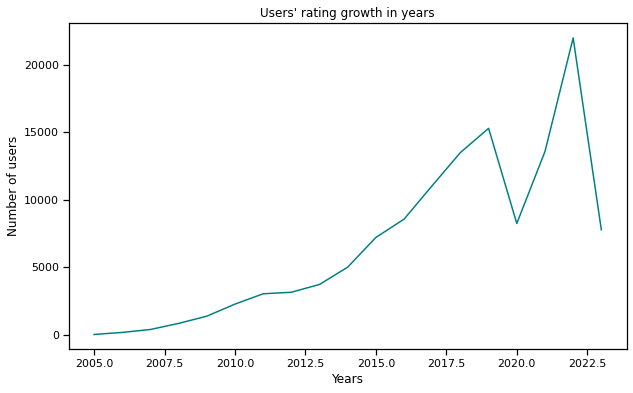

In [17]:
# years and comments trend made
myKeys = list(dic_years.keys())
myKeys.sort()

X = myKeys
y = []
for i in myKeys:
    y.append(dic_years[i]) 

year_plot = pd.DataFrame()
year_plot['years'] = X
year_plot['numbers'] = y

plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='years', y='numbers', data=year_plot, color='teal')

ax.set(xlabel='Years', ylabel='Number of users', 
       title='Users\' rating growth in years')
plt.show()
# Observations:
    # Most books in the dataset were published from 1950 to 202

# EDA

# Data Preparation

### i. Data Reduction

<ul>
    <li> Remove attributes that we don't need for content </li>
    <li> Rename attributes for better convention </li>
</ul>
    

In [18]:
# viewing the restaurant data set before cleaning occurs
display('Starting point of dataset restaurants', restaurant_df)

'Starting point of dataset restaurants'

,Name,Rating,Pricing,URL,Latitude,Longitude,Transactions,Location,Phone,Display Phone,Distance,Reviews,Review Count,Cuisine,Restaurant ID,Number of Reviews
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,40.736218,-73.995970,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",1.212367e+10,(212) 367-1979,3526.365252,[{'text': 'This small and crowded place seems ...,3,Italian,hdiuRS9sVZSMReZm4oV5SA,1851
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,40.730409,-73.986127,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",1.212255e+10,(212) 254-5370,2645.074283,[{'text': 'Absolutely LOVED LoveMama!! As a co...,3,Thai,jjJc_CrkB2HodEinB6cWww,6377
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,40.719450,-73.989800,[],"119 Orchard St, New York, NY 10002",NaN,NaN,1638.756115,[{'text': 'Edy and Josh are the BEST bartender...,3,Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,40.715661,-73.996701,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",1.212234e+10,(212) 233-8888,1766.176007,[{'text': 'This is the third stop of our food ...,3,Shanghainese,0CjK3esfpFcxIopebzjFxA,7098
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,40.714253,-73.965448,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",1.718782e+10,(718) 782-2585,1376.494330,[{'text': 'Excellent service & food! The drink...,3,CocktailBars,4DInnPhOyvXFbYpUdO0SMQ,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ABC Kitchen,5,$$$,https://www.yelp.com/biz/abc-kitchen-new-york?...,40.737750,-73.989634,['delivery'],"35 E 18th St, New York, NY 10003",1.212476e+10,(212) 475-5829,3508.876621,[{'text': 'Came in shortly after 12:30pm for a...,3,Breakfast&Brunch,dMhRafXdr765DHe0k-QfaQ,3165
496,Liberty Bagels,5,$,https://www.yelp.com/biz/liberty-bagels-new-yo...,40.763080,-73.972750,[],"16 E 58th St, New York, NY 10022",NaN,NaN,6229.014047,[{'text': 'Oh hells yes. The garlic bagel her...,3,Bagels,r1QcTb4XA1t1gmni8qMBLw,131
497,Luchadores,5,$$,https://www.yelp.com/biz/luchadores-new-york?a...,40.705820,-74.004110,"['delivery', 'pickup']","87 South St, New York, NY 10038",1.917409e+10,(917) 409-3033,2132.580935,"[{'text': ""It's gotten super popular over the ...",3,Mexican,8_NilECM6qg_L7WYb25uNw,130
498,Pier 66 Maritime,4,$$,https://www.yelp.com/biz/pier-66-maritime-new-...,40.752197,-74.009167,[],"W 26th St, Hudson River Park, New York, NY 10010",1.212990e+10,(212) 989-6363,5609.568583,"[{'text': ""My friend had her birthday dinner h...",3,American(Traditional),80jmHsdVmeYxaoAHaegKyQ,63


In [19]:
# giving the restaurants a numerical id
restaurant_df['Rest_num_id'] = pd.factorize(restaurant_df['URL'])[0]

In [20]:
# Pick out the number of restaurants already scraped in the users_revs side

filtered_restaurant_df = restaurant_df[restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
len(filtered_restaurant_df)

339

In [21]:
filtered_restaurant_df['Comments'] = ''

# loop through each row in the original dataframe
for index, row in filtered_restaurant_df.iterrows():
    # reviews = row['Reviews']
    
    url = row['URL']
    reviews = []
    holder = user_revs_df.loc[user_revs_df['URL'] == url].iterrows()
    for row in holder:
        comment = row[1]['Comment']
        if row[1]['Comment'] != 'No comment':
            reviews.append([comment])
    if reviews == []:
        reviews.append('')
    # print(reviews[0])
    # print(f'The count {index}')
    
    filtered_restaurant_df['Comments'][filtered_restaurant_df['URL'] == url] = reviews[0]

In [22]:
len(filtered_restaurant_df['Comments'][filtered_restaurant_df['Comments'] == ''])

1

* The addition of the comments column that replaces the reviews column due to the fact the information within that column was difficult to extract continuously moving forward, hence, the main reason we chose to collect the necessary comments from there in its own column

In [23]:
# removing unnecessary columns
filtered_restaurant_df.drop(columns=['Latitude', 'Longitude', 'Phone', 'Display Phone', 'Reviews',
                                    'Review Count', 'Distance'], inplace=True)


# renaming columns as a better convention
filtered_restaurant_df.rename(columns={'Name': 'name', 'Rating': 'rating', 'Rest_num_id': 'num_id',
                                       'Cuisine': 'cuisine', 'Pricing': 'price', 
                                       'URL': 'url', 'Location': 'location', 
                                      'Restaurant ID': 'id', 'Number of Reviews': 'review counts', 
                                       'Transactions': 'transactions', 'Comments': 'comments'}, inplace=True)

display('After reduction and renaming', filtered_restaurant_df.head())

'After reduction and renaming'

,name,rating,price,url,transactions,location,cuisine,id,review counts,num_id,comments
0,Da Andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,"['delivery', 'pickup', 'restaurant_reservation']","35 W 13th St, New York, NY 10011",Italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,This small and crowded place seems to be a nei...
1,LoveMama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,"['delivery', 'pickup', 'restaurant_reservation']","174 2nd Ave, New York, NY 10003",Thai,jjJc_CrkB2HodEinB6cWww,6377,1,Absolutely LOVED LoveMama!! As a college stude...
2,Ye's Apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,[],"119 Orchard St, New York, NY 10002",Szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"Good food, good service and good vibe. Drinks ..."
3,Joe's Shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,"['delivery', 'pickup']","46 Bowery St, New York, NY 10013",Shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"Casual, soup dumpling shop in Chinatown. No re..."
4,Antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"['delivery', 'pickup']","66 S 2nd St, Brooklyn, NY 11249",CocktailBars,4DInnPhOyvXFbYpUdO0SMQ,325,4,Excellent service & food! The drinks were so b...


In [24]:
user_revs_df['Account_2'] = pd.factorize(user_revs_df['Account'])[0]
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL,Account_2
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,0
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,1
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,2
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,4


In [25]:
# 
url_ids = restaurant_df[['URL','Rest_num_id']][restaurant_df['URL'].isin(user_revs_df['URL'].unique())]
url_ids
user_revs_df = pd.merge(user_revs_df, url_ids, on="URL", how='left')
user_revs_df.head()

,User_Name,Account,Location,Date_of_review,Rating,Comment,URL,Account_2,Rest_num_id
0,Richard D.,/user_details?userid=pRfWy61wU9e1nrCVrOEWLA,"New York, NY",2/16/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,0,258.0
1,Elisa H.,/user_details?userid=ExhcUTTcj_MBhZdFQT9KYg,"Brooklyn, NY",1/6/2023,4.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,1,258.0
2,Morlene C.,/user_details?userid=VLTBPUrbNRR-f84h-altQw,"Brooklyn, NY",12/15/2022,3.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,2,258.0
3,Ruwan J.,/user_details?userid=xBVo8v0mw64nk6K-pYgI6A,"New York, NY",3/23/2023,4.0,Urbanspace Union Square is a newish addition-...,https://www.yelp.com/biz/urbanspace-union-squa...,3,258.0
4,Mike C.,/user_details?userid=37cpUoM8hlkSQfReIEBd-Q,"Forest Hills, NY",12/14/2022,5.0,No comment,https://www.yelp.com/biz/urbanspace-union-squa...,4,258.0


In [26]:
filtered_users_df = user_revs_df.copy()

# removing unnecessary columns
filtered_users_df.drop(columns=['User_Name', 'Location', 'Date_of_review', 'Comment', 'Account', 'URL'], inplace=True)

# renaming the remaining columns appropriately
filtered_users_df.rename(columns={'Account_2': 'user-id', 'Rest_num_id': 'restaurant-id',
                                 'Rating': 'rating',}, inplace=True)

display('After reduction on user df', filtered_users_df)


'After reduction on user df'

,rating,user-id,restaurant-id
0,4.0,0,258.0
1,4.0,1,258.0
2,3.0,2,258.0
3,4.0,3,258.0
4,5.0,4,258.0
...,...,...,...
139107,5.0,83016,NaN
139108,3.0,15312,NaN
139109,5.0,90323,NaN
139110,5.0,30740,NaN


### ii. Missing Values

In [27]:
# missing values on the restaurant df
display('Missing Values', filtered_restaurant_df.stb.missing())

'Missing Values'

,missing,total,percent
price,131,339,38.643068
name,0,339,0.000000
rating,0,339,0.000000
url,0,339,0.000000
transactions,0,339,0.000000
location,0,339,0.000000
cuisine,0,339,0.000000
id,0,339,0.000000
review counts,0,339,0.000000
num_id,0,339,0.000000


In [28]:
# missing values on the user df
display('Missing Values', filtered_users_df.stb.missing())

'Missing Values'

,missing,total,percent
restaurant-id,14019,139112,10.077492
rating,0,139112,0.000000
user-id,0,139112,0.000000


<p>The price range is currently missing 27% of the total number of restaurants collected.</p>
<ul>
<li>Making replacements can be a good way to retain the data and can act as potentially new categories of classifying unknown restaurants</li></ul>

In [29]:
# using rating data to replace
# Since it is categorical data, we can use mode
filtered_restaurant_df['price'] = filtered_restaurant_df['price'].fillna(filtered_restaurant_df['price'].mode()[0])
display('Missing Values', filtered_restaurant_df.stb.missing())

'Missing Values'

,missing,total,percent
name,0,339,0.0
rating,0,339,0.0
price,0,339,0.0
url,0,339,0.0
transactions,0,339,0.0
location,0,339,0.0
cuisine,0,339,0.0
id,0,339,0.0
review counts,0,339,0.0
num_id,0,339,0.0


In [30]:
# dropping the null value restaurants
filtered_users_df.dropna(axis=0, inplace=True)
display('After dropping missing Values', filtered_users_df.stb.missing())

'After dropping missing Values'

,missing,total,percent
rating,0,125093,0.0
user-id,0,125093,0.0
restaurant-id,0,125093,0.0


### iii. Data transformation

<p>Switching all the columns to <strong>lower</strong> case</p>

In [31]:
# Converting the columns to lower case
# no need for this step on the user df
filtered_restaurant_df['name'] = filtered_restaurant_df['name'].str.lower()
filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.lower()
filtered_restaurant_df['cuisine'] = filtered_restaurant_df['cuisine'].str.lower()
filtered_restaurant_df['comments'] = filtered_restaurant_df['comments'].str.lower()

filtered_restaurant_df.sample(5)

,name,rating,price,url,transactions,location,cuisine,id,review counts,num_id,comments
139,dunhuang miss noodles,1,$$,https://www.yelp.com/biz/dunhuang-miss-noodles...,"['delivery', 'pickup']","531 myrtle ave, brooklyn, ny 11205",chinese,cOtB9fWWLrbaBebZDjJquQ,85,135,the food has consistently been really good. i ...
5,raku,4,$$,https://www.yelp.com/biz/raku-new-york-7?adjus...,"['delivery', 'pickup']","342 e 6th st, new york, ny 10003",japanese,FlZ1zdVEKWv7dwqm8Uw8-w,1497,5,"delicious food, there are heaters for the outs..."
335,no. 7,3,$$,https://www.yelp.com/biz/no-7-brooklyn-3?adjus...,[],"627 vanderbilt ave, brooklyn, ny 11238",american(new),nnMEtKLL0lyaXyXACRkVEQ,8,319,popped in to the new no 7 on a weeknight this ...
198,miznon,4,$$,https://www.yelp.com/biz/miznon-new-york-7?adj...,"['delivery', 'pickup']","20 hudson yards, new york, ny 10001",sandwiches,OOAFPiztVlStZIUDwcixqA,100,194,pricey but very good. the wild mushroom pita ...
71,c as in charlie,4,$$,https://www.yelp.com/biz/c-as-in-charlie-new-y...,[],"5 bleecker st, new york, ny 10012",korean,pZWhRtCJvTuwWoavaiCQrA,112,71,"overall great experience. food was tasty, serv..."


<p>Handling the <strong>transactions</strong> column so as to get a standard formatting style</p>

In [32]:
from ast import literal_eval

# converts the strings to python list
filtered_restaurant_df['transactions'] = filtered_restaurant_df['transactions'].apply(lambda x: literal_eval(x))

# joins the created python lists together
filtered_restaurant_df['transactions'] = filtered_restaurant_df['transactions'].apply(lambda x: ', '.join(x))

In [33]:
display('filtered transactions', filtered_restaurant_df['transactions'].head())

'filtered transactions'

0    delivery, pickup, restaurant_reservation
1    delivery, pickup, restaurant_reservation
2                                            
3                            delivery, pickup
4                            delivery, pickup
Name: transactions, dtype: object

In [34]:
# Dataset so far
display('All changes done so far', filtered_restaurant_df.head())

'All changes done so far'

,name,rating,price,url,transactions,location,cuisine,id,review counts,num_id,comments
0,da andrea,4,$$,https://www.yelp.com/biz/da-andrea-new-york?ad...,"delivery, pickup, restaurant_reservation","35 w 13th st, new york, ny 10011",italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,this small and crowded place seems to be a nei...
1,lovemama,5,$$,https://www.yelp.com/biz/lovemama-new-york?adj...,"delivery, pickup, restaurant_reservation","174 2nd ave, new york, ny 10003",thai,jjJc_CrkB2HodEinB6cWww,6377,1,absolutely loved lovemama!! as a college stude...
2,ye's apothecary,5,$$$,https://www.yelp.com/biz/yes-apothecary-new-yo...,,"119 orchard st, new york, ny 10002",szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"good food, good service and good vibe. drinks ..."
3,joe's shanghai,4,$$,https://www.yelp.com/biz/joes-shanghai-new-yor...,"delivery, pickup","46 bowery st, new york, ny 10013",shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"casual, soup dumpling shop in chinatown. no re..."
4,antidote,4,$$,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"delivery, pickup","66 s 2nd st, brooklyn, ny 11249",cocktailbars,4DInnPhOyvXFbYpUdO0SMQ,325,4,excellent service & food! the drinks were so b...


<p>Time to deal with the price column and convert the signs to meaningful values.
<br>Listing all the possible values of price in the dataset first</p>

<br>

* All the values on the user df are at the correct format as for now 


In [35]:
filtered_restaurant_df['price'].unique()

array(['$$', '$$$', '$$$$', '$'], dtype=object)

<p>There are 4 ranges so far:</p>

<ul>
<li> Mid-range (3 signs) </li>
<li> Cheap Eats (1 sign) </li>
<li> Affordable (2 signs) </li>
<li> Pricey Dining (4 signs) </li>
</ul>

In [36]:
# replacing the signs
filtered_restaurant_df['price'].replace(['$$', '$$$$', '$', '$$$'], ['low', 'pricey-dining', 'popular-eats', 'mid-range'], inplace=True)

In [37]:
constituents_list = list(set(filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)))

In [38]:
# viewing the locations restaurants are commonly located
constituents_list

[' jersey city',
 ' sunnyside',
 ' long island city',
 'new york',
 ' new york',
 ' manhattan',
 ' woodside',
 ' ridgewood',
 ' brooklyn']

In [39]:
# Need to work on locations
filtered_restaurant_df['location'] = filtered_restaurant_df['location'].str.split(',').str[-2].str.strip(string.punctuation)

# adjusting the new york ward to be represented better
filtered_restaurant_df.loc[filtered_restaurant_df.location == 'new york', 'location'] = ' new york'


display('All changes done before preprocessing on text data', filtered_restaurant_df.head())

'All changes done before preprocessing on text data'

,name,rating,price,url,transactions,location,cuisine,id,review counts,num_id,comments
0,da andrea,4,low,https://www.yelp.com/biz/da-andrea-new-york?ad...,"delivery, pickup, restaurant_reservation",new york,italian,hdiuRS9sVZSMReZm4oV5SA,1851,0,this small and crowded place seems to be a nei...
1,lovemama,5,low,https://www.yelp.com/biz/lovemama-new-york?adj...,"delivery, pickup, restaurant_reservation",new york,thai,jjJc_CrkB2HodEinB6cWww,6377,1,absolutely loved lovemama!! as a college stude...
2,ye's apothecary,5,mid-range,https://www.yelp.com/biz/yes-apothecary-new-yo...,,new york,szechuan,8YWLuLUKj0t_0_Xv06UUtw,212,2,"good food, good service and good vibe. drinks ..."
3,joe's shanghai,4,low,https://www.yelp.com/biz/joes-shanghai-new-yor...,"delivery, pickup",new york,shanghainese,0CjK3esfpFcxIopebzjFxA,7098,3,"casual, soup dumpling shop in chinatown. no re..."
4,antidote,4,low,https://www.yelp.com/biz/antidote-brooklyn-2?a...,"delivery, pickup",brooklyn,cocktailbars,4DInnPhOyvXFbYpUdO0SMQ,325,4,excellent service & food! the drinks were so b...


In [40]:
# updating the constituents list
constituents_list = list(filtered_restaurant_df['location'].unique())
constituents_list

[' new york',
 ' brooklyn',
 ' sunnyside',
 ' ridgewood',
 ' woodside',
 ' jersey city',
 ' long island city',
 ' manhattan']

### iv. Preprocess text data

<p> We chose to use NLTK word Lemmatizer and also remove English stop words and non alphabet tokens from reviews and style attributes. </p>

<p>Let's handle the function for that:</p>

In [41]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        # only verbs
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [42]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\GM\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [43]:
# creation of filtered comments
filtered_restaurant_df['processed_comments'] = filtered_restaurant_df['comments'].apply(process_sentences)

In [44]:
# creation of filtered cuisines
filtered_restaurant_df['processed_cuisine'] = filtered_restaurant_df['cuisine'].apply(process_sentences)

In [45]:
# creation of filtered transactions
filtered_restaurant_df['processed_transactions'] = filtered_restaurant_df['transactions'].apply(process_sentences)

* Time to compare the processed columns (i.e. cuisine & comments)

In [46]:
filtered_restaurant_df[['processed_comments', 'comments', 'processed_cuisine', 'cuisine', 'processed_transactions', 'transactions']].sample(5)

,processed_comments,comments,processed_cuisine,cuisine,processed_transactions,transactions
284,amaze food dish pack flavor get dumpling fish ...,amazing food. each dish was packed with flavor...,dessert,desserts,,
93,walk around wait table restaurant nearby find ...,was walking around waiting for a table at a re...,chinese,chinese,,
294,come brunch husband love sit covered outdoor p...,came here for brunch with my husband and loved...,american new,american(new),delivery pickup,"delivery, pickup"
332,food really good portion smaller side excellen...,the food is really good. the portion is on the...,greek,greek,pickup delivery,"pickup, delivery"
361,good meal cute outdoor seating enjoy order bit...,good meal and cute outdoor seating. enjoyed w...,italian,italian,pickup delivery,"pickup, delivery"


<p>Eventually, let's create a bag_of_words with a combination of our new preprocessed attributes:</p>
<br>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; <strong>bag of words=style processed+reviews processed</strong>

In [47]:
filtered_restaurant_df['bogs'] = filtered_restaurant_df['processed_cuisine'] + ' ' + filtered_restaurant_df['processed_comments'] + ' ' + filtered_restaurant_df['processed_transactions']
display('A sample of bag of words', filtered_restaurant_df[['processed_comments', 'processed_cuisine', 'processed_transactions','bogs']].sample(5))

'A sample of bag of words'

,processed_comments,processed_cuisine,processed_transactions,bogs
25,alright excite pineapple pork bun love chinato...,dimsum,delivery pickup,dimsum alright excite pineapple pork bun love ...
440,amazing service go happy hour deal good oyster...,seafood,delivery pickup,seafood amazing service go happy hour deal goo...
19,walk friday night put name around texted avail...,american new,,american new walk friday night put name around...
56,outdoor seating area extremely retro vibe neon...,korean,pickup delivery,korean outdoor seating area extremely retro vi...
46,daughter use pulsed voucher brunch order pizza...,italian,delivery pickup,italian daughter use pulsed voucher brunch ord...


* The last transformation we needed to do was on the reclassified prices.
* We did a map of words to show synonymns of the price class in a way

In [48]:
price_map = {
    'low':('everybody', 'no-expense', 'accomodating', 'inexpensive', 'cheap', 'ample', 'rock-bottom'), 
    'popular-eats': ('low-price', 'low-cost', 'economical', 'economic', 'modest'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'pricey-dining': ('expensive', 'fancy', 'lavish', 'fine', 'extravagant')
}

# Modeling

**a. Content Based Recommendation**

In [49]:
def contentB_recommend(description):
    # Convert user input to lowercase
    description = description.lower()

    data = filtered_restaurant_df.copy()

    # Extract cities
    constituents_input = []
    for const in constituents_list:
        if const in description:
            constituents_input.append(const)
            description = description.replace(const, "")

    if constituents_input:
        data = data[data['location'].isin(constituents_input)]

    # Extract price class
    for key, value in price_map.items():
        if any(v in description for v in value):
            data = data[data['price'] == key]
            break
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bogs"])
    features = vec.transform(data["bogs"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)
    
    results = data[['name', 'rating', 'location', 'price', 'cuisine', 'transactions', 'comments', 'similarity', 'id', 'num_id']]

    return results.head(25)

In [50]:
# specified cuisine
contentB_recommend('for chinese food')

Processed user feedback: chinese food


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
2,ye's apothecary,5,new york,mid-range,szechuan,,"good food, good service and good vibe. drinks ...",0.346936,8YWLuLUKj0t_0_Xv06UUtw,2
282,bites of xi'an,4,brooklyn,popular-eats,chinese,delivery,wonderful pork and cabbage dumplings. great be...,0.275822,rPTX2J5KGDkN1QhPD-QOvg,266
172,silky kitchen,4,new york,low,chinese,"delivery, pickup",a self-service chinese restaurant with a decen...,0.257998,olRNNJCJ2TJvPRmjBiOcGA,168
31,tasty hand-pulled noodles,4,new york,low,chinese,"delivery, pickup",ok noodles. no different than noodles that you...,0.229493,97q5nUQTuBo_h00XCxna2A,31
334,chinah,4,brooklyn,low,chinese,"pickup, delivery",the people working there are professional and ...,0.222075,j61hBldPvd47MdLgeySlxQ,318
96,fong on,4,new york,popular-eats,chinese,delivery,savory tofu - flavor mixture was tasty; textur...,0.182069,iKW9zBGWfE9CM6MfK0UtjA,96
93,sun hing lung co,5,new york,popular-eats,chinese,,was walking around waiting for a table at a re...,0.181576,9-vKFnUby_6-pR6UJxjzMw,93
139,dunhuang miss noodles,1,brooklyn,low,chinese,"delivery, pickup",the food has consistently been really good. i ...,0.176785,cOtB9fWWLrbaBebZDjJquQ,135
125,shanghai 21,5,new york,low,shanghainese,"delivery, pickup",we ate here after the chinese new year parade ...,0.153361,R26zweQ8-xoZS7iHkXQOvw,121
177,bonnie's,3,brooklyn,mid-range,cantonese,,food was good but i didn't think it was worth ...,0.148423,k0fnJRSV8tzM2bzkvFdlGg,173


In [51]:
# with price class and location
contentB_recommend('a reasonable breakfast')

Processed user feedback: reasonable breakfast


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
495,abc kitchen,5,new york,mid-range,breakfast&brunch,delivery,"absolutely phenomenal!!! i got the special, wh...",0.117774,dMhRafXdr765DHe0k-QfaQ,430
275,electric lemon,3,new york,mid-range,american(new),,i absolutely loved the electric lemon! the fir...,0.091862,OBRYVNn2FRhVCCadoFepBQ,259
56,nowon,5,new york,mid-range,korean,"pickup, delivery",the outdoor seating area has an extremely retr...,0.000000,LMyvruexOQzzHQrAgbdqiA,56
428,black walnut,3,brooklyn,mid-range,venues&eventspaces,"delivery, pickup",we were looking for a place for dinner after s...,0.000000,d0Up0vNOqr1eL3EtjHboMA,395
348,olmsted,1,brooklyn,mid-range,american(new),"pickup, delivery",my boyfriend and i came here for our anniversa...,0.000000,Ulr_Nyp2nvt82EPH_BiftA,332
367,olmsted,1,brooklyn,mid-range,american(new),"pickup, delivery",my boyfriend and i came here for our anniversa...,0.000000,Ulr_Nyp2nvt82EPH_BiftA,332
376,fine & rare,4,new york,mid-range,american(new),"pickup, delivery",excellent night great service atmosphere was e...,0.000000,Xk3BVvlX-KXh6kJhbClMKw,343
384,karasu,4,brooklyn,mid-range,japanese,,karasu is a japanese speakeasy hidden behind a...,0.000000,eyjeP9CJZ_gYgeJFP_vtpQ,351
396,popular,1,new york,mid-range,peruvian,,date night approved!!!!! can't wait to go back...,0.000000,UUkSQzJVsbOla6Os9NZT9Q,363
423,xixa,4,brooklyn,mid-range,mexican,"delivery, pickup",this is my second time here. the first time wa...,0.000000,Ck09FempamAKGSPsV_bX-A,390


In [52]:
# with transaction and price class and location
contentB_recommend('burgers in Newyork')

Processed user feedback: burger newyork


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
370,7th street burger,4,new york,low,burgers,"pickup, delivery",my brother claimed this the best burger of nyc...,0.622086,VVYea3NzbklOyHEzSEavWw,337
389,the hihi room,4,new york,low,burgers,"pickup, delivery",i dislike veggie burgers. but they have an ama...,0.577149,QyB52nUrwJRY0ipuwcfR_A,356
411,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.486602,H26qMBb0OFNn2xmSTM1Phw,378
451,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.486602,H26qMBb0OFNn2xmSTM1Phw,378
301,miznon,4,new york,low,mediterranean,"pickup, delivery",my favorite burger place!! very close to 7th s...,0.334829,kTQ0rRfgtlPwX9_O8OY_UA,285
251,macao trading company,5,new york,mid-range,asianfusion,"delivery, pickup",just come for the drinks and bar. cocktails so...,0.277762,U74_3F7r3tMhd6dmTmDBxQ,235
239,macao trading company,5,new york,mid-range,asianfusion,"delivery, pickup",just come for the drinks and bar. cocktails so...,0.277762,U74_3F7r3tMhd6dmTmDBxQ,235
176,emily - west village,5,new york,low,pizza,"delivery, pickup",service and staff is a little disorganized but...,0.269548,m86CNmYThtzzWB3nPnrhbg,172
252,monkey bar,2,new york,low,american(traditional),,this is probably the best burger i've ever had...,0.259565,gZz9A8k8ORC_xl0aHxtY4w,236
240,monkey bar,2,new york,low,american(traditional),,this is probably the best burger i've ever had...,0.259565,gZz9A8k8ORC_xl0aHxtY4w,236


In [53]:
# with transaction and price class and location
contentB_recommend('I want a mid-range american(new) chicken restaurant with delivery')

Processed user feedback: want american new chicken restaurant delivery


,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
262,chino grande,5,brooklyn,low,american(new),,had to try this new spot after hearing so many...,0.271397,XQiIGgSjx3wIxvvzOZP9Cw,246
400,go! go! curry!,4,new york,low,japanesecurry,"delivery, pickup","best japanese curry in my opinion, they are co...",0.213053,alFl7eiu6Go-YxZAdp88Fw,367
376,fine & rare,4,new york,mid-range,american(new),"pickup, delivery",excellent night great service atmosphere was e...,0.209960,Xk3BVvlX-KXh6kJhbClMKw,343
393,five leaves,1,brooklyn,low,american(new),delivery,excellent restaurant. the most delicious food....,0.208275,1Q3oaJahyGRogDWgpo7PIw,360
494,bowery road,3,new york,mid-range,american(new),"delivery, pickup",we came at a down time around midday for the r...,0.200317,FJepPR5CYRggxRwAjlqg6A,429
182,cool world,5,brooklyn,low,american(new),,everything was next level. so well done and be...,0.175385,1lPcNVCHCNE6KbQJzbguzQ,178
69,white oak tavern,4,new york,low,american(new),"pickup, delivery",i have been to the tavern a few times and love...,0.165903,mVN2G1c5bRtAsNlr2Tbx6Q,69
299,gage and tollner,5,brooklyn,pricey-dining,american(traditional),delivery,food was great. definitely get the chicken liv...,0.162715,G5YZ7UcqCEYtezOxEETZjQ,283
64,ingas bar,3,brooklyn,low,american(new),,cool relaxed vibe. this would be a good date s...,0.156640,48nRODGl30EWpYMcCTOeAw,64
473,boulton & watt,5,new york,low,american(new),"delivery, pickup","great service, food and drinks! shout out to k...",0.154202,Cz6It2NB_QBXCjnlsWGZSA,401


**b. CF based recommendation system**

* We will not be implementing Collaborative Filtering from scratch. 
 Instead, we will use the Surprise library that used extremely powerful algorithms like
**Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations.**

In [54]:
# surprise reader
reader = Reader(rating_scale=(1, 5))

In [55]:
data = Dataset.load_from_df(filtered_users_df[['user-id', 'restaurant-id', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.25)

In [56]:
model = SVD()
# cross_validate(model, trainset, measures=['rmse', 'mae'], cv=5)

In [57]:
# data_train = data.build_full_trainset()
model.fit(trainset)

In [58]:
predictions = model.test(testset)

In [59]:
# Viewing contents of test set
for uid, bid, rating in testset[:5]:
    print(f"User {uid} rated restaurant {bid} with a rating of {rating}")

User 13014 rated restaurant 247.0 with a rating of 4.0
User 79163 rated restaurant 137.0 with a rating of 3.0
User 5554 rated restaurant 3.0 with a rating of 3.0
User 21520 rated restaurant 145.0 with a rating of 2.0
User 6614 rated restaurant 1.0 with a rating of 5.0


In [60]:
# Viewing predictions
for prediction in predictions[0:5]:
    print(prediction)

user: 13014      item: 247.0      r_ui = 4.00   est = 4.26   {'was_impossible': False}
user: 79163      item: 137.0      r_ui = 3.00   est = 4.13   {'was_impossible': False}
user: 5554       item: 3.0        r_ui = 3.00   est = 3.93   {'was_impossible': False}
user: 21520      item: 145.0      r_ui = 2.00   est = 3.77   {'was_impossible': False}
user: 6614       item: 1.0        r_ui = 5.00   est = 4.29   {'was_impossible': False}


In [61]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 1.0465


1.0465209768643409

In [62]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

**Recommending unseen restaurants to the test set**

In [63]:
# Get list of user ids from test set
users = list(set(uids))

In [64]:
# books which the users have not yet evaluated
restaurants = trainset.build_anti_testset()

In [65]:
# using an example of 15 users
for user_id in users[0:15]:
    rests_seen = list(filter(lambda x: x[0] == user_id, restaurants))
    
    print(f'This user {user_id} has rated {len(rests_seen)} restaurants')
    
    # generate recommendations
    recommendations = model.test(rests_seen)
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    
    print(f"This user {user_id}'s recommendations:")
    # viewing 3 recommendations if available
    for reco in recommendations[0:3]:
        name = filtered_restaurant_df['name'][filtered_restaurant_df['id'] == (reco[1])]
        print(f'Restaurant {reco[1]} with estimated rating {reco[3]}')

This user 0 has rated 288 restaurants
This user 0's recommendations:
Restaurant 45.0 with estimated rating 4.87033972847202
Restaurant 23.0 with estimated rating 4.803119820893705
Restaurant 244.0 with estimated rating 4.730920257810258
This user 1 has rated 283 restaurants
This user 1's recommendations:
Restaurant 244.0 with estimated rating 4.763796219330045
Restaurant 139.0 with estimated rating 4.76081084809158
Restaurant 141.0 with estimated rating 4.758013057605561
This user 2 has rated 273 restaurants
This user 2's recommendations:
Restaurant 141.0 with estimated rating 4.8582253024360975
Restaurant 108.0 with estimated rating 4.766488597716608
Restaurant 23.0 with estimated rating 4.753758236777377
This user 3 has rated 293 restaurants
This user 3's recommendations:
Restaurant 382.0 with estimated rating 5
Restaurant 45.0 with estimated rating 5
Restaurant 130.0 with estimated rating 4.95245139456083
This user 4 has rated 272 restaurants
This user 4's recommendations:
Restauran

In [66]:
model.predict(8, 208)

Prediction(uid=8, iid=208, r_ui=None, est=4.56427897979452, details={'was_impossible': False})

**c. Hybrid recommendation system**

* In this section, will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work

In [67]:
id_map = pd.read_csv('restaurant_data.csv')
id_map.drop_duplicates(subset=['Restaurant ID'], inplace=True)
len(id_map)

435

In [68]:
def hybrid_recommender(userId, description):
    rest = contentB_recommend(description)
    # print(rest)
    display('Prior to personal recommendations: ', rest.head(10))
    rest['est'] = rest['num_id'].apply(lambda x: model.predict(userId, x).est)
    rest = rest.sort_values('est', ascending=False)
    print('\n\n\n\n')
    return display('Predicted:', rest.head(10))

In [69]:
len(filtered_users_df[filtered_users_df['user-id'] == 1])

17

In [73]:
filtered_restaurant_df[filtered_restaurant_df['id'] == 'cHvd_fnNqbcR4EdyodzGzw']

,name,rating,price,url,transactions,location,cuisine,id,review counts,num_id,comments,processed_comments,processed_cuisine,processed_transactions,bogs
184,koloman,4,pricey-dining,https://www.yelp.com/biz/koloman-new-york-2?ad...,,new york,austrian,cHvd_fnNqbcR4EdyodzGzw,65,180,this place is amazing. my husband and i went h...,place amaze husband go friday night order dish...,austrian,,austrian place amaze husband go friday night o...


In [74]:
hybrid_recommender(1, 'good korean with delivery')

Processed user feedback: good korean delivery


'Prior to personal recommendations: '

,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
303,k'ook,4,new york,low,korean,"pickup, delivery",recently went again and their happy hour deals...,0.292132,igcUHNvsKc-s-RtvUmkg2w,287
212,naro,5,new york,pricey-dining,korean,,came here for our engagement anniversary dinne...,0.265048,OFc7aHP1chwqXTgtYtbJzQ,208
56,nowon,5,new york,mid-range,korean,"pickup, delivery",the outdoor seating area has an extremely retr...,0.216069,LMyvruexOQzzHQrAgbdqiA,56
2,ye's apothecary,5,new york,mid-range,szechuan,,"good food, good service and good vibe. drinks ...",0.211780,8YWLuLUKj0t_0_Xv06UUtw,2
226,gunbae tribeca,4,new york,low,korean,"delivery, pickup, restaurant_reservation",came here with a large group and was throughly...,0.200768,0GN6l4FAknTFSWZhEan45A,222
10,ariari,5,new york,low,korean,,"this place is amazing. great service, kind sta...",0.200623,nMyot99PkX5iYCdxHoRJqQ,10
47,atti,4,brooklyn,pricey-dining,korean,"delivery, pickup",went here with a party of six. as soon as we e...,0.199235,mnXrPqOVbX_06D9OAo4dLA,47
145,dumpling n' dips,3,new york,popular-eats,dimsum,"delivery, pickup",my first time to try dumplings in thai taste w...,0.194476,qvX5If0CwM1RGzP3ie4SKA,141
71,c as in charlie,4,new york,low,korean,,"overall great experience. food was tasty, serv...",0.176260,pZWhRtCJvTuwWoavaiCQrA,71
468,ai ki ya,3,new york,low,ramen,"delivery, pickup",good food! nice vibes! good service! one of my...,0.174184,MTtqSunPEZwdCJFMHsiHzg,420


'Predicted:'

,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
145,dumpling n' dips,3,new york,popular-eats,dimsum,"delivery, pickup",my first time to try dumplings in thai taste w...,0.194476,qvX5If0CwM1RGzP3ie4SKA,141,4.758013
48,mokyo,4,new york,low,korean,"delivery, pickup",some hits and some misses - the gumbo and rice...,0.165392,e5wK3I_THzF4Ce_OgoSCQw,48,4.728854
355,medusa the greek,5,brooklyn,low,greek,"pickup, delivery",the food is really good. the portion is on the...,0.165961,h77VtGL7BCXvAALx-ZFbVA,316,4.524255
332,medusa the greek,5,brooklyn,low,greek,"pickup, delivery",the food is really good. the portion is on the...,0.165961,h77VtGL7BCXvAALx-ZFbVA,316,4.524255
71,c as in charlie,4,new york,low,korean,,"overall great experience. food was tasty, serv...",0.176260,pZWhRtCJvTuwWoavaiCQrA,71,4.515523
2,ye's apothecary,5,new york,mid-range,szechuan,,"good food, good service and good vibe. drinks ...",0.211780,8YWLuLUKj0t_0_Xv06UUtw,2,4.514342
109,olle,5,new york,low,korean,,wow... had solo lunch here and got the gupo gu...,0.144848,V95hnN4N2vw1ph2mDxIA7w,105,4.512365
203,prime meat rokko,5,new york,low,japanese,"delivery, pickup",delicious! always authentic and flavorful! rea...,0.123462,dEbI8l8o9mevbRdjANzsng,199,4.501754
47,atti,4,brooklyn,pricey-dining,korean,"delivery, pickup",went here with a party of six. as soon as we e...,0.199235,mnXrPqOVbX_06D9OAo4dLA,47,4.490674
10,ariari,5,new york,low,korean,,"this place is amazing. great service, kind sta...",0.200623,nMyot99PkX5iYCdxHoRJqQ,10,4.389454


In [72]:
hybrid_recommender(0, 'burgers in nyc')

Processed user feedback: burger nyc


'Prior to personal recommendations: '

,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id
370,7th street burger,4,new york,low,burgers,"pickup, delivery",my brother claimed this the best burger of nyc...,0.586564,VVYea3NzbklOyHEzSEavWw,337
389,the hihi room,4,new york,low,burgers,"pickup, delivery",i dislike veggie burgers. but they have an ama...,0.402536,QyB52nUrwJRY0ipuwcfR_A,356
411,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.339384,H26qMBb0OFNn2xmSTM1Phw,378
451,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.339384,H26qMBb0OFNn2xmSTM1Phw,378
301,miznon,4,new york,low,mediterranean,"pickup, delivery",my favorite burger place!! very close to 7th s...,0.233529,kTQ0rRfgtlPwX9_O8OY_UA,285
468,ai ki ya,3,new york,low,ramen,"delivery, pickup",good food! nice vibes! good service! one of my...,0.219248,MTtqSunPEZwdCJFMHsiHzg,420
325,lupa,4,new york,mid-range,italian,"pickup, delivery","it's been quite sometime since i've been here,...",0.201726,yZJbealagfujEkgesAl2hA,309
251,macao trading company,5,new york,mid-range,asianfusion,"delivery, pickup",just come for the drinks and bar. cocktails so...,0.193727,U74_3F7r3tMhd6dmTmDBxQ,235
239,macao trading company,5,new york,mid-range,asianfusion,"delivery, pickup",just come for the drinks and bar. cocktails so...,0.193727,U74_3F7r3tMhd6dmTmDBxQ,235
176,emily - west village,5,new york,low,pizza,"delivery, pickup",service and staff is a little disorganized but...,0.187998,m86CNmYThtzzWB3nPnrhbg,172


'Predicted:'

,name,rating,location,price,cuisine,transactions,comments,similarity,id,num_id,est
411,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.339384,H26qMBb0OFNn2xmSTM1Phw,378,4.599077
451,kings of kobe,4,new york,low,burgers,"delivery, pickup",the kings of kobe was a great burger place and...,0.339384,H26qMBb0OFNn2xmSTM1Phw,378,4.599077
184,koloman,4,new york,pricey-dining,austrian,,this place is amazing. my husband and i went h...,0.111406,cHvd_fnNqbcR4EdyodzGzw,180,4.576638
265,aska,2,brooklyn,pricey-dining,scandinavian,,one of the best dining experiences of my life....,0.130766,UM3DuPsG6UKdmsC23O_Icw,249,4.451920
392,the warren,5,new york,low,gastropubs,"pickup, delivery",this place is cozy and dimly lit and the food ...,0.130499,4LoroCI3VtQ17dyQa75-Rg,359,4.448414
291,loreto italian kitchen & bar,1,brooklyn,low,lounges,"delivery, pickup",the interior setting is nice. they aren't tryi...,0.167026,wCj2FSi9o6iosMIMNIIZsA,275,4.406551
370,7th street burger,4,new york,low,burgers,"pickup, delivery",my brother claimed this the best burger of nyc...,0.586564,VVYea3NzbklOyHEzSEavWw,337,4.393044
64,ingas bar,3,brooklyn,low,american(new),,cool relaxed vibe. this would be a good date s...,0.170287,48nRODGl30EWpYMcCTOeAw,64,4.348300
389,the hihi room,4,new york,low,burgers,"pickup, delivery",i dislike veggie burgers. but they have an ama...,0.402536,QyB52nUrwJRY0ipuwcfR_A,356,4.340134
430,virginia's,5,new york,low,american(traditional),,banana pudding and molten chocolate cake are t...,0.125225,jlbtOUU-dmPwLwSYXal2oQ,397,4.234209


# Evaluation

# Deployment